In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [13]:
def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def baseline_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def mutator_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def pS_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + baseline_single_mut(genotypes_names, pop_vec))

def pM_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + mutator_nomut(genotypes_names, pop_vec))

def pR_proportion(genotypes_names, pop_vec):
    return(baseline_single_mut(genotypes_names, pop_vec)/baseline_nomut(genotypes_names, pop_vec))

def association(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec)/pS_proportion(genotypes_names, pop_vec))

def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [20]:
files = [file for file in os.listdir('asymmetry_paramgrid/') if 'results' in file and len(file.split('_')) == 3]
files_test = [file for file in files if '_0_' in file]
with open('asymmetry_paramgrid/'+'paramgrid_asymmetry.txt','rb') as f:
    param_grid = pickle.load(f)

In [21]:
genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))

In [22]:
all_results = {}

for p in range(12):

    heatmap_m0 = np.zeros((100,100))
    heatmap_m1 = np.zeros((100,100))
    heatmap_M0 = np.zeros((100,100))
    heatmap_M1 = np.zeros((100,100))
    
    heatmap_pM = np.zeros((100,100))
    heatmap_pS = np.zeros((100,100))
    
    heatmap_association = np.zeros((100,100))
    heatmap_adaptation = np.zeros((100,100))

    for i in range(100):
        
        with open('asymmetry_paramgrid/results_'+str(p)+'_'+str(i)+'.txt', 'rb') as f:
            file_result = pickle.load(f)
            for j in range(100):
                
                result_m0 = baseline_nomut(genotype_names_3, file_result[j])
                result_m1 = baseline_single_mut(genotype_names_3, file_result[j])
                result_M0 = mutator_nomut(genotype_names_3, file_result[j])
                result_M1 = mutator_single_mut(genotype_names_3, file_result[j])
                
                result_pM = pM_proportion(genotype_names_3, file_result[j])
                result_pS = pS_proportion(genotype_names_3, file_result[j])
                
                result_association = result_M1 - result_pM*result_pS
                result_adaptation = param_grid[p]['mu']*np.exp(-param_grid[p]['mu'])*result_m1 + param_grid[p]['tau']*param_grid[p]['mu']*np.exp(-param_grid[p]['tau']*param_grid[p]['mu'])*result_M1
                
                heatmap_m0[99-i,j] = result_m0
                heatmap_m1[99-i,j] = result_m1
                heatmap_M0[99-i,j] = result_M0                
                heatmap_M1[99-i,j] = result_M1
                
                heatmap_pM[99-i,j] = result_pM
                heatmap_pS[99-i,j] = result_pS
                
                heatmap_association[99-i,j] = result_association
                heatmap_adaptation[99-i,j] = result_adaptation
                

    all_results[(param_grid[p]['mu'], param_grid[p]['s'], param_grid[p]['tau'])] = {'m1':heatmap_m1, 
                                                                                    'm0': heatmap_m0, 
                                                                                    'M0': heatmap_M0, 
                                                                                    'M1': heatmap_M1, 
                                                                                    'pS': heatmap_pS, 
                                                                                    'pM': heatmap_pM, 
                                                                                    'adaptation': heatmap_adaptation, 
                                                                                    'association': heatmap_association}

In [23]:
def desai_formula(gamma, tau, U):
    return(gamma/(tau*U))

In [37]:
switching_rates = np.logspace(-6, np.log10(0.5), 100)
params = list(all_results.keys())
set_paramsets_s = [(0,1,6,7),
                   (2,3,8,9),
                   (4,5,10,11)]

In [67]:
names_params = [('$U$ = 4$\cdot$$10^{-5}$ \n$\\tau$ = 10', 
                 '$U$ = 4$\cdot$$10^{-5}$ \n$\\tau$ = 100',
                 '$U$ = 0.0001 \n $\\tau$ = 10',
                 '$U$ = 0.0001 \n $\\tau$ = 100'),
               ('$U$ = 4$\cdot$$10^{-5}$ \n$\\tau$ = 10', 
                 '$U$ = 4$\cdot$$10^{-5}$ \n$\\tau$ = 100',
                 '$U$ = 0.0001 \n $\\tau$ = 10',
                 '$U$ = 0.0001 \n $\\tau$ = 100')]

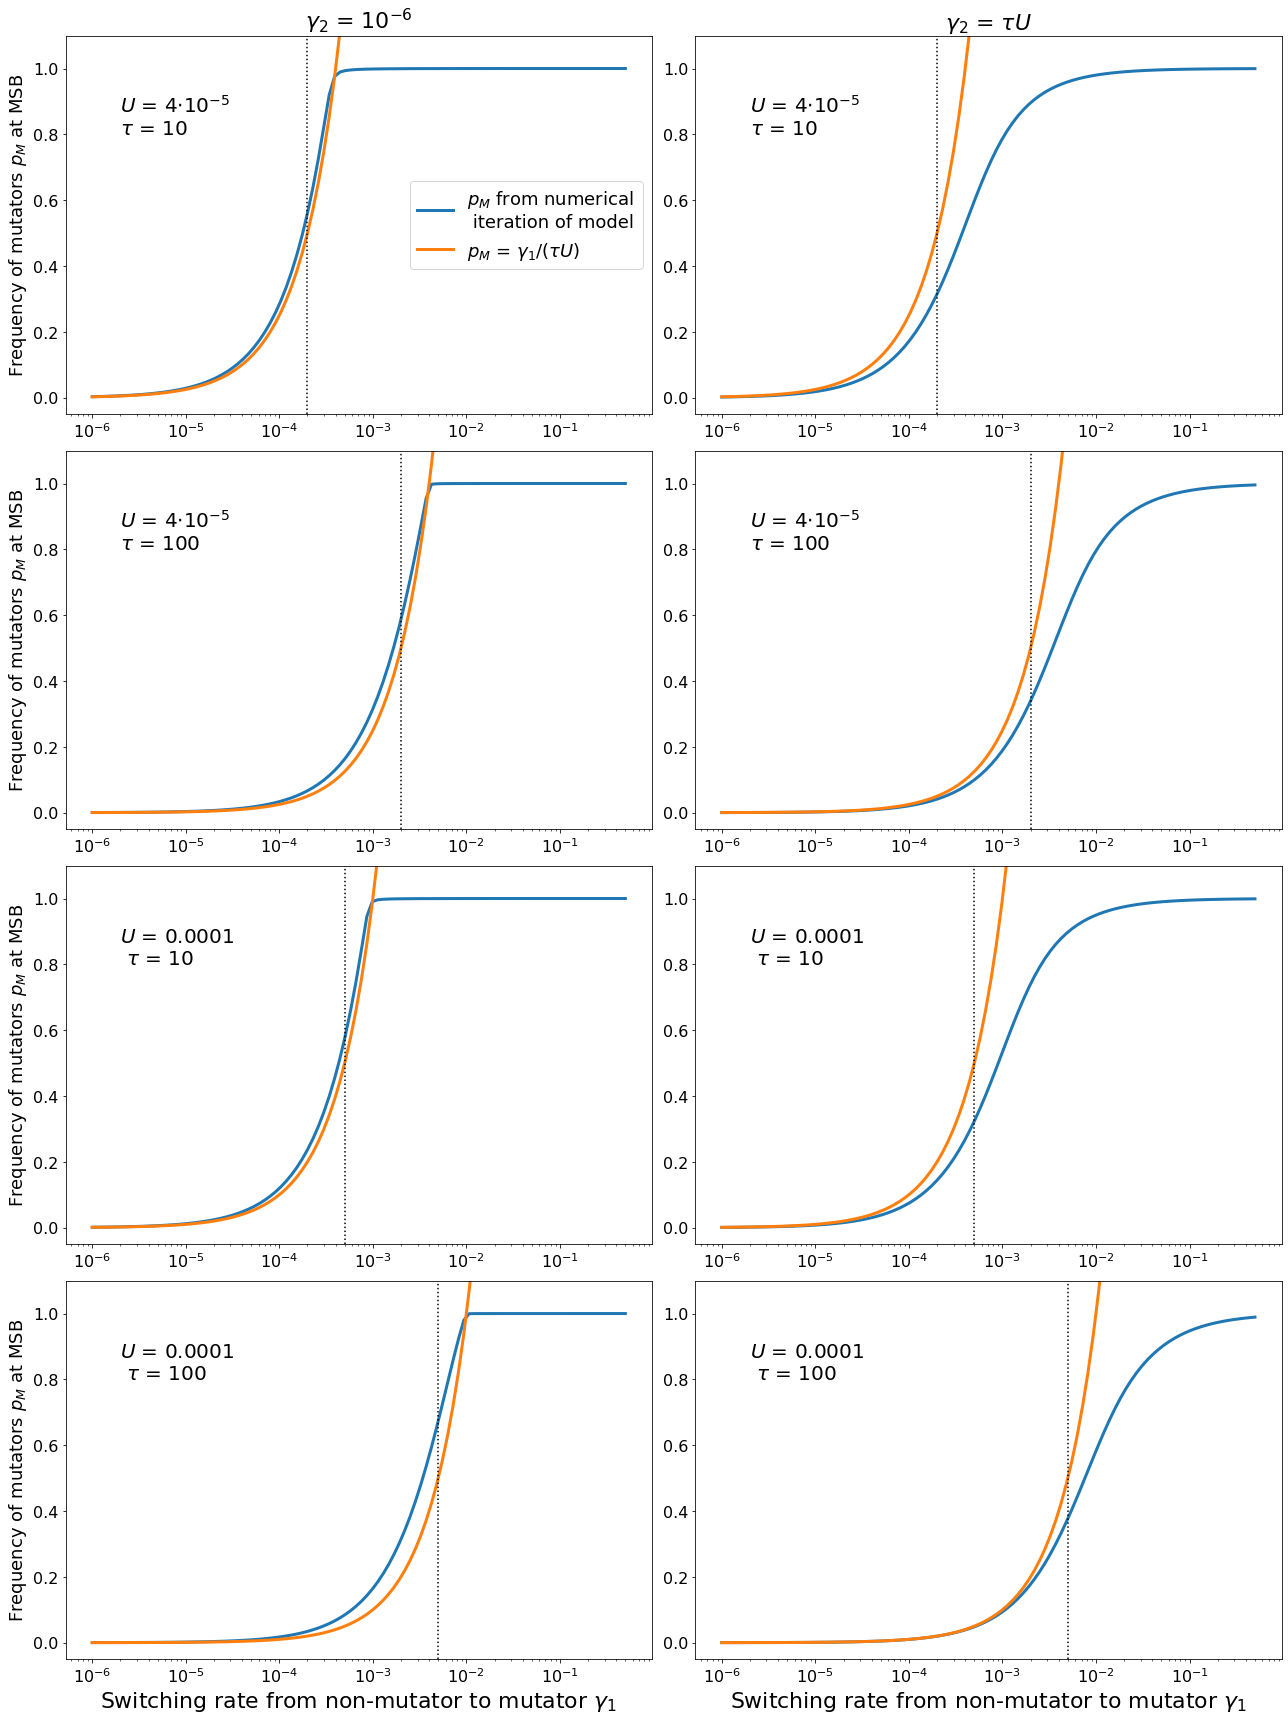

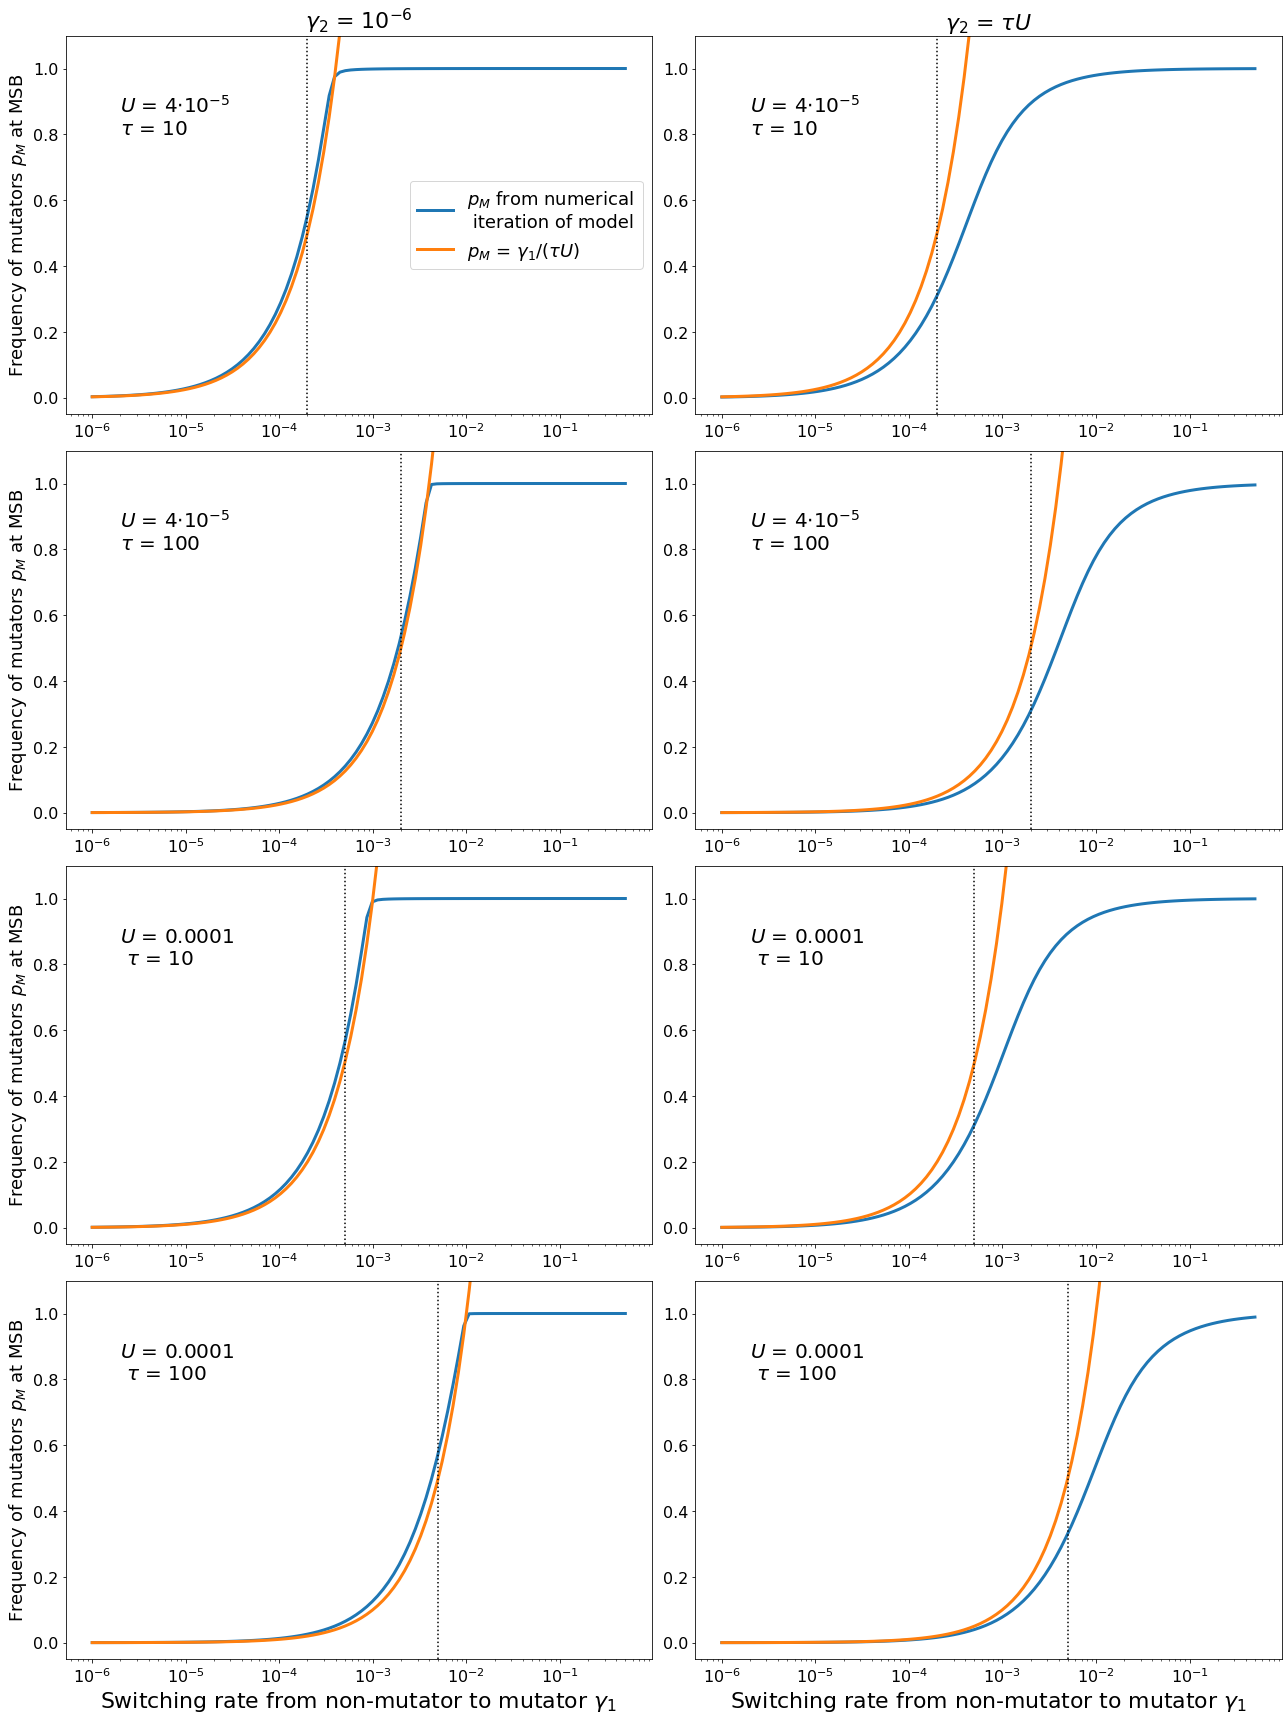

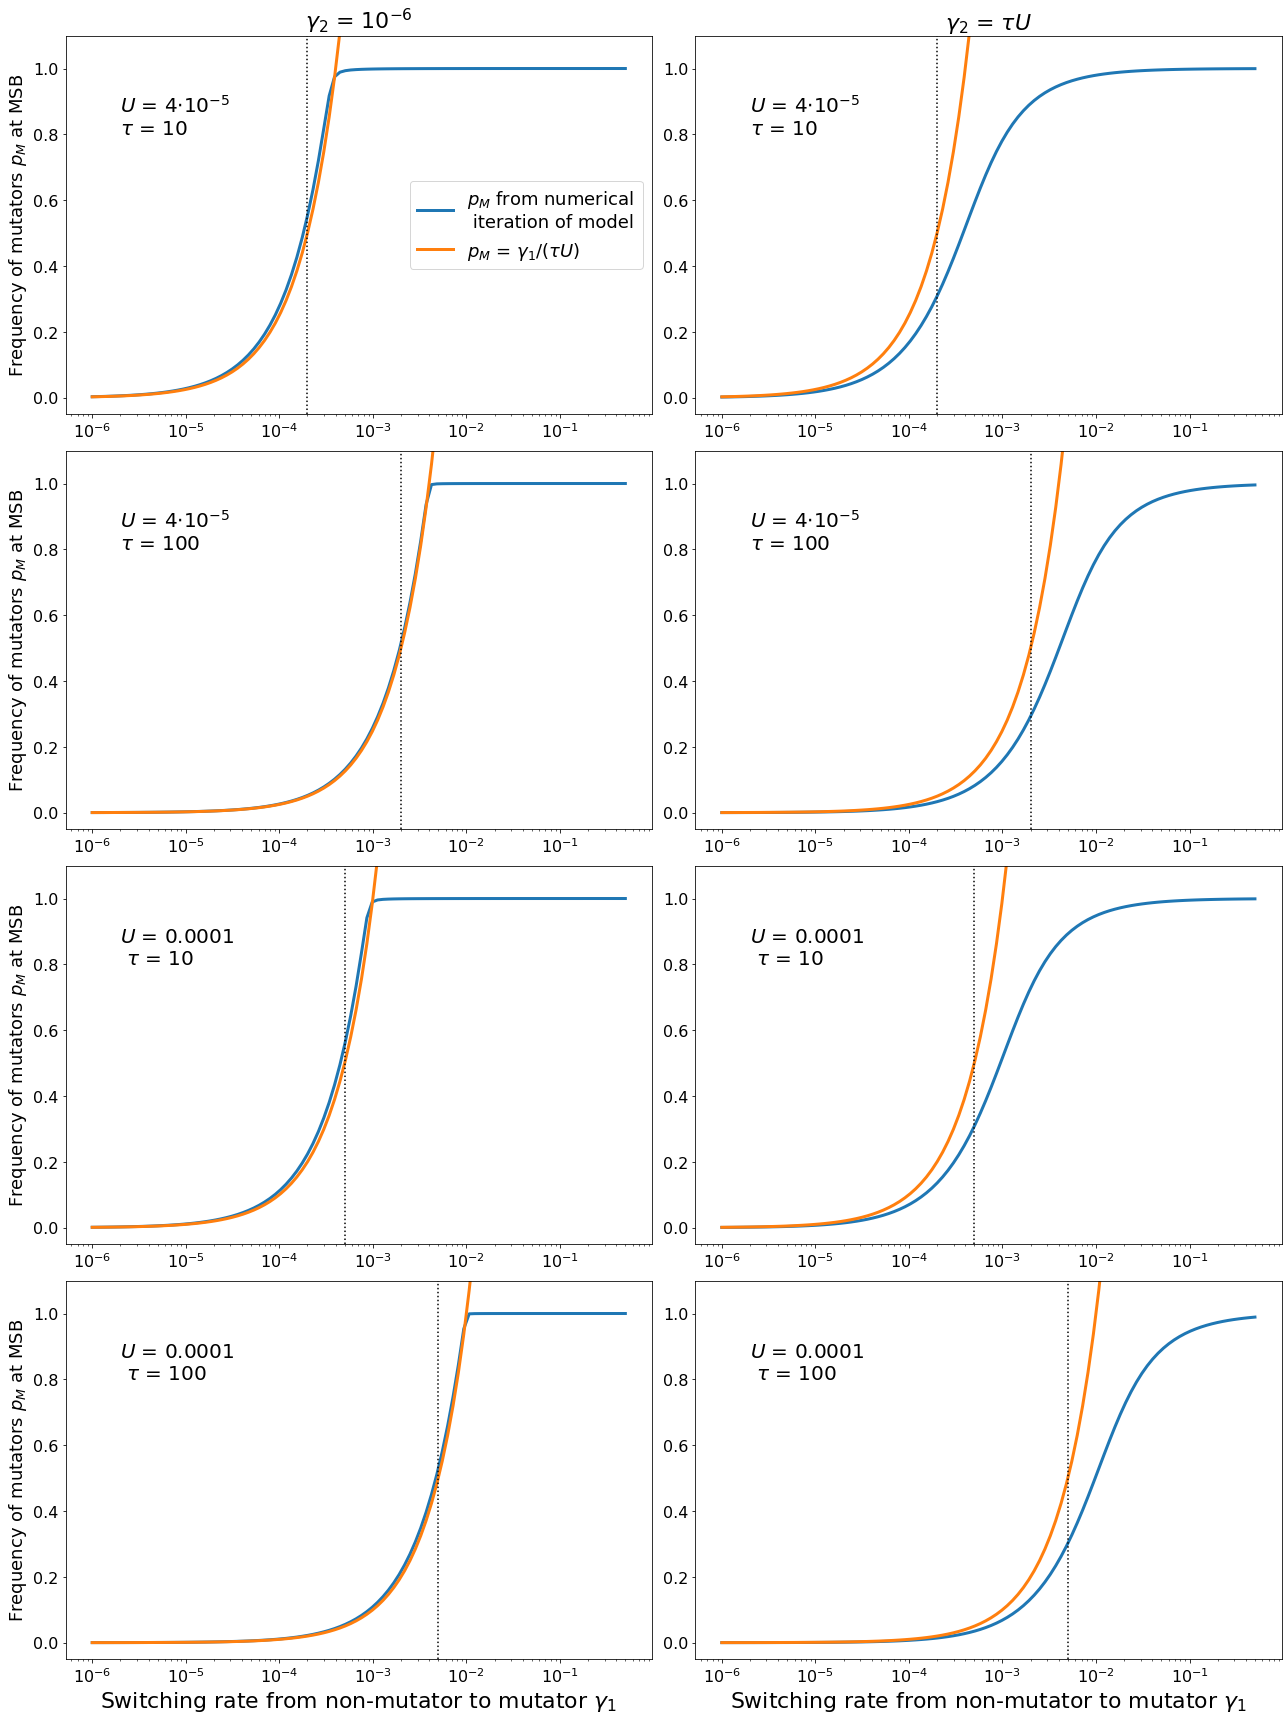

In [87]:
for p in range(3):

    fig, ax = plt.subplots(4,2, figsize = (18,24))
    
    for s in range(4):

        ax[s,0].plot(switching_rates, all_results[params[set_paramsets_s[p][s]]]['pM'][:,0][::-1], linewidth = 3)
        desai_approx = desai_formula(switching_rates, params[set_paramsets_s[p][s]][-1], params[set_paramsets_s[p][s]][0])
        ax[s,0].plot(switching_rates, desai_approx, linewidth = 3)

        mutau_closest = np.searchsorted(switching_rates, 0.5*params[set_paramsets_s[p][s]][-1]*params[set_paramsets_s[p][s]][0])
        ax[s,1].plot(switching_rates,  all_results[params[set_paramsets_s[p][s]]]['pM'][:,mutau_closest][::-1], linewidth = 3)
        desai_approx = desai_formula(switching_rates, params[set_paramsets_s[p][s]][-1], params[set_paramsets_s[p][s]][0])
        ax[s,1].plot(switching_rates, desai_approx, linewidth = 3)
                
        ax[s,0].axvline(0.5*params[set_paramsets_s[p][s]][-1]*params[set_paramsets_s[p][s]][0], linestyle = 'dotted', c = 'k')
        ax[s,1].axvline(0.5*params[set_paramsets_s[p][s]][-1]*params[set_paramsets_s[p][s]][0], linestyle = 'dotted', c = 'k')
        
    for i in range(4):
        ax[i,0].set_ylabel('Frequency of mutators $p_M$ at MSB', fontsize = 18)
        for j in range(2):
            ax[i,j].set_xscale('log')
            ax[i,j].set_ylim(-0.05,1.1)
            ax[i,j].tick_params(labelsize = 16)
            ax[3,j].set_xlabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 22)
            ax[i,j].text(2e-6,0.8,names_params[j][i], fontsize = 20)
            
    ax[0,0].set_title('$\gamma_2$ = $10^{-6}$', fontsize = 22)
    ax[0,1].set_title('$\gamma_2$ = $\\tau$$U$', fontsize = 22)
    ax[0,0].legend(['$p_M$ from numerical \n iteration of model', '$p_M$ = $\gamma_1$/$(\\tau$$U$)'], fontsize = 18, loc = 'center right')
    
    plt.tight_layout()
    output_folder = 'figures/desai_simul_comparison/'
    plt.savefig(output_folder+'desai_comparison_'+str(p)+'.jpg', dpi = 400)
    plt.show()    

In [ ]:
0.00020073085902760145
0.0021816772733726383
0.0005076584485817266
0.005517571664225632
